# Libraries

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [108]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', 1000)

# Case study information

**BUTTON TEST VERSIONS:**


*   **Eniac_a:** White “SHOP NOW”
*   **Eniac_b:** Red “SHOP NOW”
*   **Eniac_c:** White “SEE DEALS”
*   **Eniac_d:** Red “SEE DEALS”

**METRICS TRACKED:**


*   Click-through rate (CTR) for the homepage.
*   Drop-off rate for the linked page.
*   Homepage-return rate for the category pages.

**DECISION BASE:**
For a version to be considered superior, there must be statistical significance in the click-through rate.

**QUESTIONS TO ANSWER:**


*   What was the click-through rate for each version?
*   Which version was the winner?
*   Do the results seem conclusive?

Statistical significance chosen: **95%**

Minimum detectable effect set: **20%**


# Hypothesis testing: Chi-Square Test within the Eniac case study

In this notebook I perform a chi-square test with Eniac case study data, applying a post-hoc correction to perform pairwise tests and find the "true" version winner.

## 1.&nbsp;Null Hypothesis and the Alternative Hypothesis


**Null Hypothesis ( 𝐻0 ):** all versions (A, B, C and D) of the button have the same Click-Through Rate (CTR).

**Alternative Hypothesis:** there is a difference in the CTR for the different versions.

## 2.&nbsp; Significance level alpha ($\alpha$)

Decision made that a relatively high alpha was acceptable in this case.

In [109]:
alpha = 0.05

## 3.&nbsp; Data 

In [110]:
# eniac_a.csv
eniac_a = 'https://drive.google.com/file/d/1lhJa-9TtOIcJlbVdOIHV6kuYnG95Fa62/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+eniac_a.split('/')[-2]
version_a = pd.read_csv(path)

# eniac_b.csv
eniac_b = 'https://drive.google.com/file/d/1IiE24mCxkEr9fKtw0hYHPjdfeTb3om0V/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+eniac_b.split('/')[-2]
version_b = pd.read_csv(path)

# eniac_c.csv
eniac_c = 'https://drive.google.com/file/d/1YdLIDfpoyzwkSVtH-MvHMJGKZeNMe85T/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+eniac_c.split('/')[-2]
version_c = pd.read_csv(path)

# eniac_d.csv
eniac_d = 'https://drive.google.com/file/d/1NHztDmJOw6rkpEjYKBtcUrQuAtOVDksq/view?usp=sharing'
path = 'https://drive.google.com/uc?export=download&id='+eniac_d.split('/')[-2]
version_d = pd.read_csv(path)

In [111]:
version_a.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • https://eniac.com/index-a.php
1,25,div,mySidebar,309,True,"created 2021-09-14 • 14 days 0 hours 34 mins • 25326 visits, 23174 clicks"


In [112]:
version_b.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,236,True,Homepage Version B - red SHOP NOW • https://eniac.com/index-b.php
1,25,div,mySidebar,304,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 24747 visits, 22407 clicks"


In [113]:
version_c.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,288,True,Homepage Version C - white SEE DEALS • https://eniac.com/index-c.php
1,25,div,mySidebar,283,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 24876 visits, 23031 clicks"


In [114]:
version_d.head(2)

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,285,True,Homepage Version D - red SEE DEALS • https://eniac.com/index-d.php
1,25,div,mySidebar,305,True,"created 2021-10-27 • 14 days 0 hours 34 mins • 25233 visits, 22743 clicks"


In [115]:
#clicks for button of interest listed under column "Name"
#no_clicks for button calculated from visits to homepage (in column "Snapshot information","visits") - clicks for button of interest
vA_clicks = 512
vB_clicks = 281
vC_clicks = 527
vD_clicks = 193


vA_no_clicks = 25326 - vA_clicks
vB_no_clicks = 24747 - vB_clicks
vC_no_clicks = 24876 - vC_clicks
vD_no_clicks = 25233 - vD_clicks

In [116]:
vA_clicks, vB_clicks, vC_clicks, vD_clicks

(512, 281, 527, 193)

In [117]:
vA_no_clicks, vB_no_clicks, vC_no_clicks, vD_no_clicks

(24814, 24466, 24349, 25040)

In [118]:
clicks = [512, 281, 527, 193]
no_clicks = [24814, 24466, 24349, 25040]

observed_results = pd.DataFrame ([clicks, no_clicks],
                                 columns = ["A", "B", "C", "D"],
                                 index = ["clicks", "no_clicks"])
observed_results

,A,B,C,D
clicks,512,281,527,193
no_clicks,24814,24466,24349,25040


## 4.&nbsp; Test results

### Degrees of freedom

𝑑𝑜𝑓=(𝑛−1)×(𝑟−1)

In [119]:
#n=number of columns
n = observed_results.shape[1]
n

4

In [120]:
#r=number of rows
r = observed_results.shape[0]
r

2

In [121]:
dof = (n-1) * (r-1)
dof

3

### Expected value for each cell

\begin{align}
E = \frac{(Total\ in\ Column) \times (Total\ in\ Row)}{Grand\ Total}
    \end{align}

**E**= the value for **each** cell


In [ ]:
def calculate_expected(observed_df):
    # Calculate the expected value for each cell

    # Calculate row totals - stored as a Series
    row_totals = observed_df.sum(axis=1)

    # Calculate column totals - stored as a Series
    column_totals = observed_df.sum(axis=0)

    # Calculate the grand total
    grand_total = observed_df.values.sum()

    # Create an empty DataFrame to store the expected values
    expected_values = pd.DataFrame(columns=observed_df.columns, index=observed_df.index)

    # Calculate expected values for each cell
    for row_label in observed_df.index:
        for col_label in observed_df.columns:
            # Use the formula to calculate the expected value
            expected_value = (row_totals[row_label] * column_totals[col_label]) / grand_total
            # Store the expected value in the DataFrame
            expected_values.loc[row_label, col_label] = expected_value

    return expected_values

In [123]:
expected_results = calculate_expected(observed_results)
expected_results

,A,B,C,D
clicks,382.486255,373.7419,375.690124,381.081721
no_clicks,24943.513745,24373.2581,24500.309876,24851.918279


### Chi-squared statistic

Formula:

\begin{align}
\sum_{}\frac{(O-E)^2} {E}
    \end{align}

In [124]:
chi_squared = ((observed_results - expected_results)**2 / expected_results)
chi_squared

,A,B,C,D
clicks,43.854674,23.013368,60.940326,92.82716
no_clicks,0.672472,0.352889,0.934465,1.423421


In [125]:
chi_squared = ((observed_results - expected_results)**2 / expected_results).sum().sum()
chi_squared

224.0187748805841

In [126]:
#verifying value --> checking on chi-squre value for cell clicks A
((512-382.486255)*(512-382.486255))/382.486255

43.854674317447085

In [127]:
#verifying chi-square value (adding the chi-square of each individual cell)
sum([43.854674,23.013368,60.940326,92.82716, 0.672472,0.352889,0.934465,1.423421])

224.018775

### Chi-squared distribution and test statistic

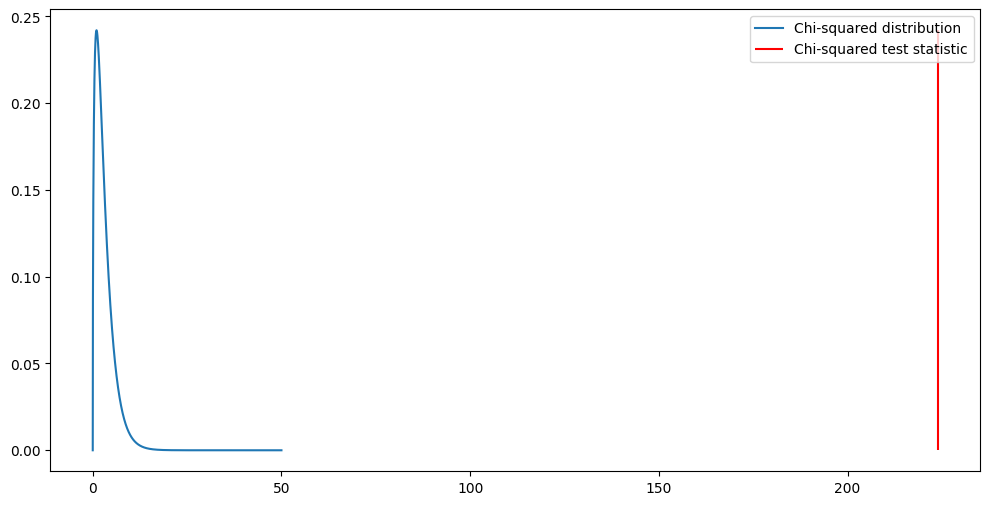

In [128]:
plt.figure(figsize=(12,6))
# Create a linear space from 0 to 50 with 1000 intervals for our x-axis.
xt = np.linspace(0,50,1000)
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,dof), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="red", label="Chi-squared test statistic")
plt.legend()
plt.show()

## 5.&nbsp; Interpretation of the test result

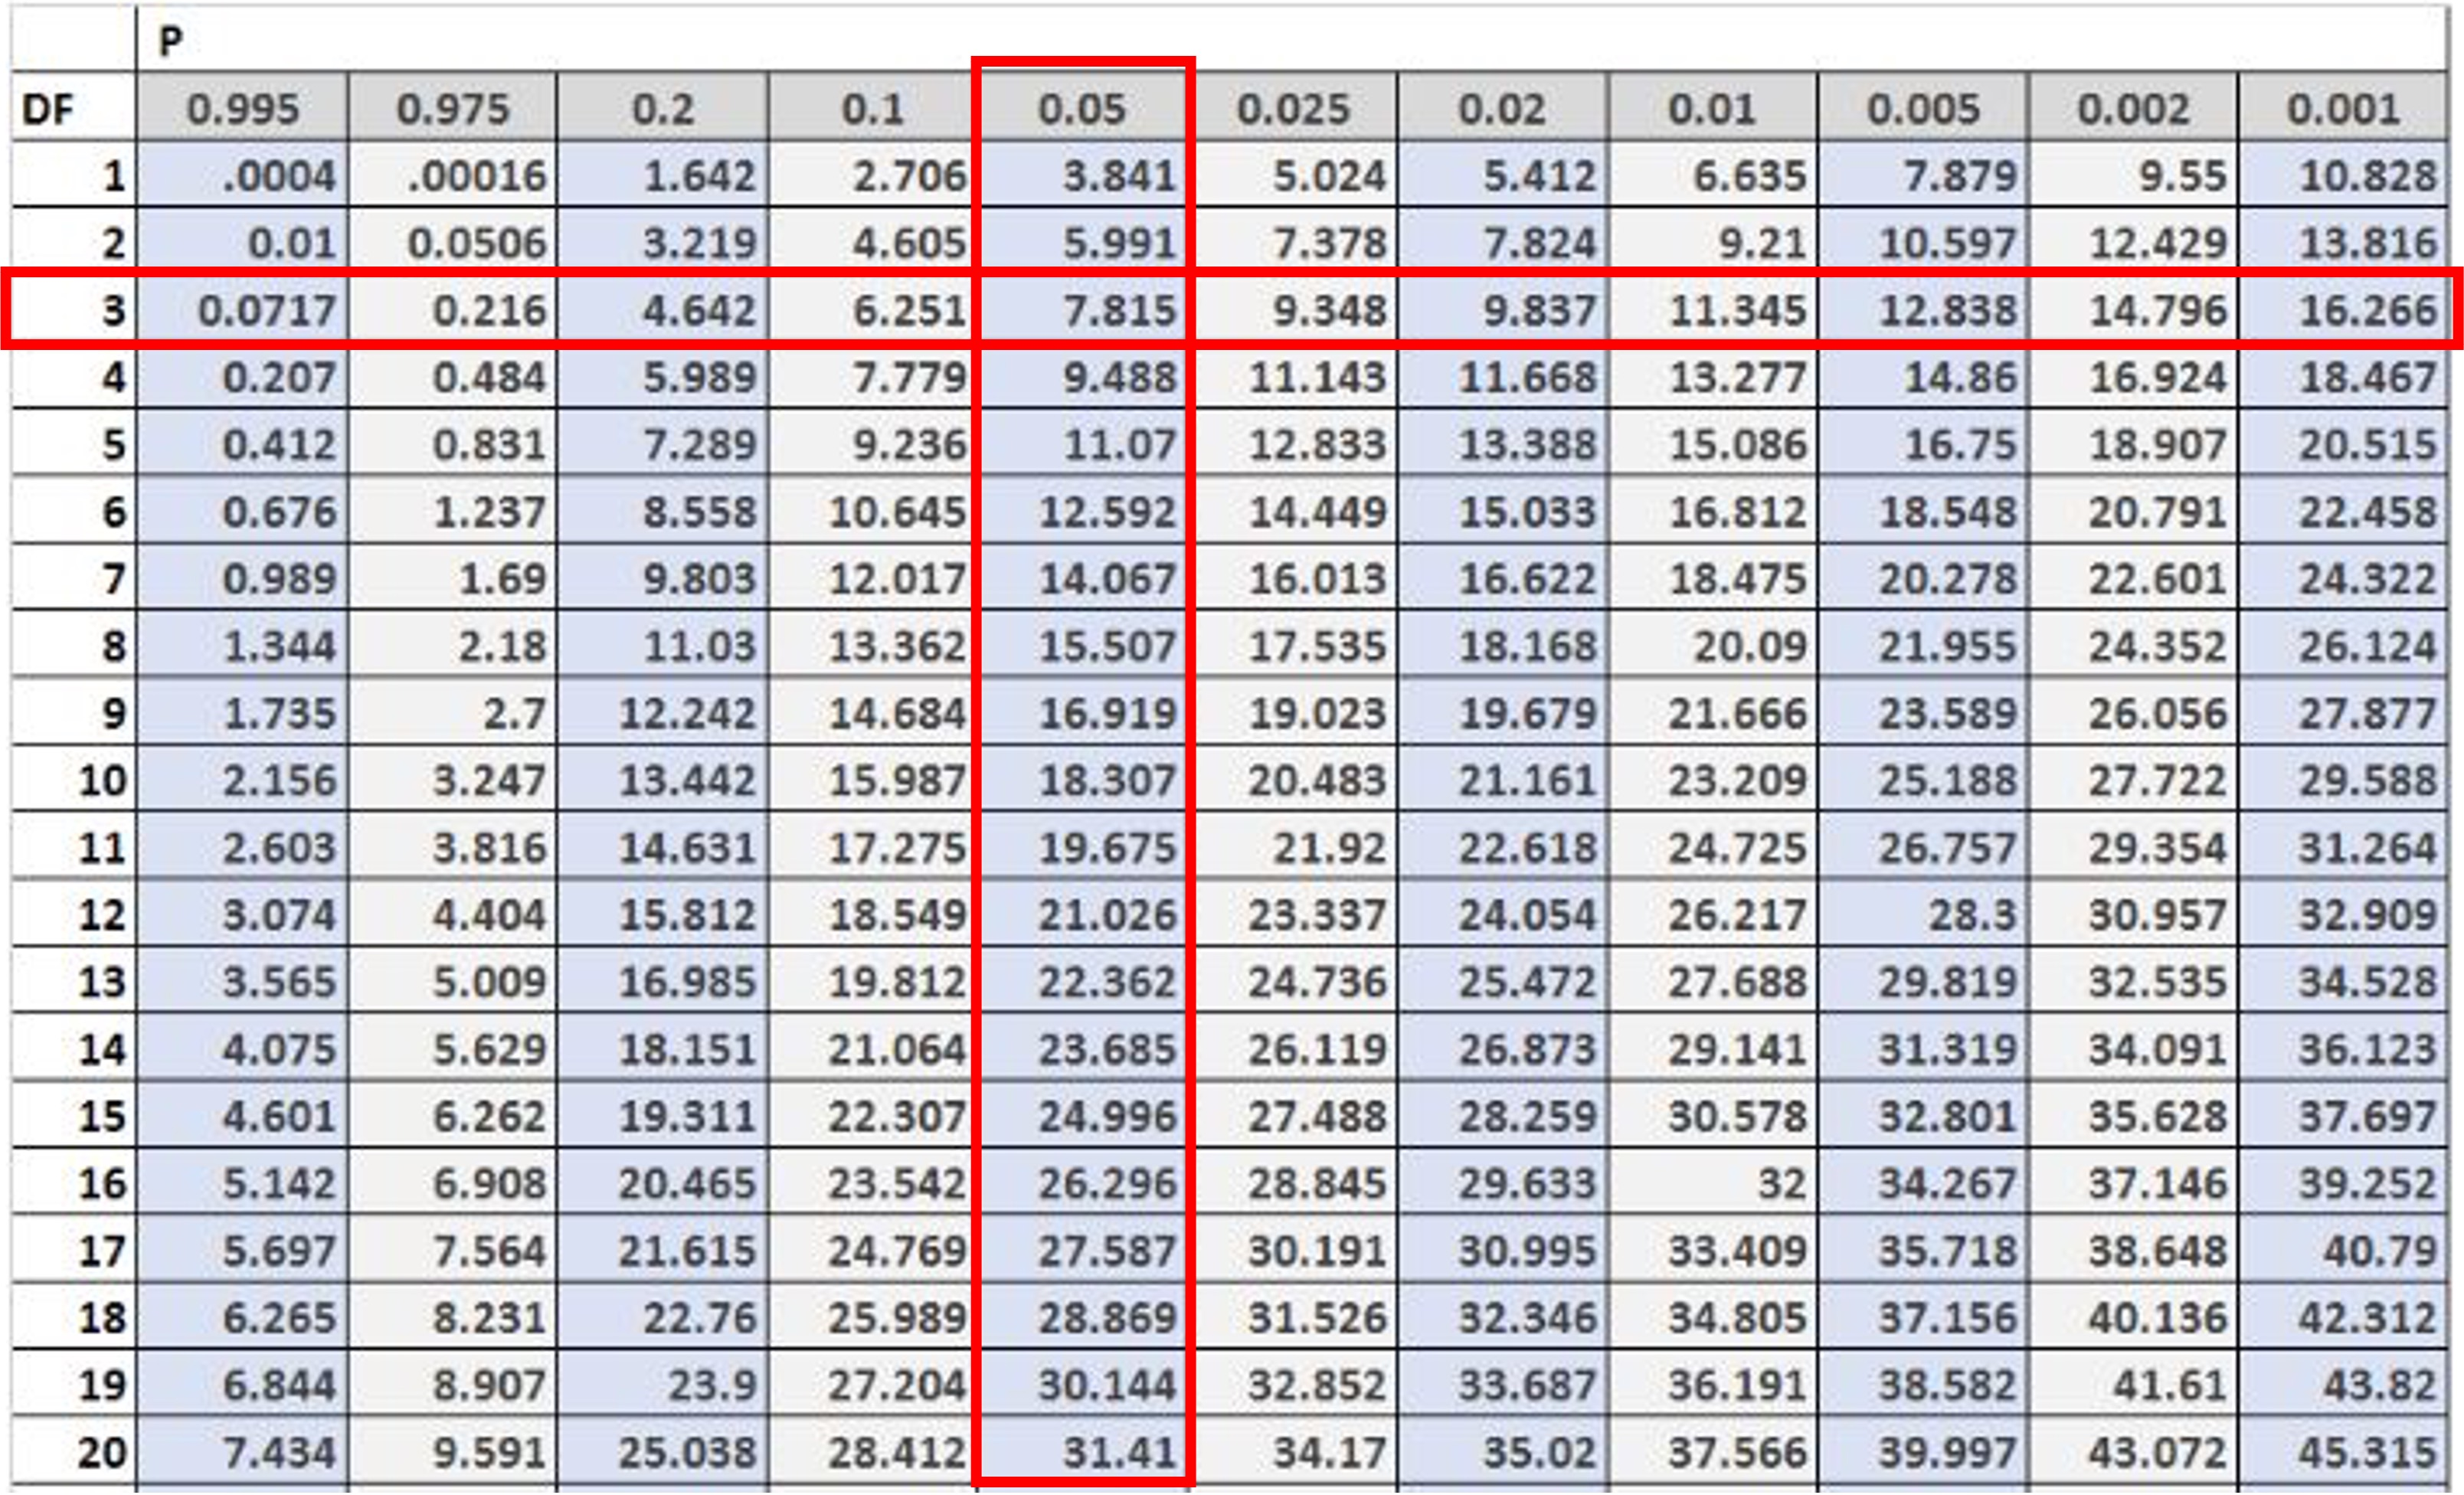

In [129]:
critical_value = 7.815

In [130]:
chi_squared

224.0187748805841

### Chi-squared distribution, test statistic and critical region

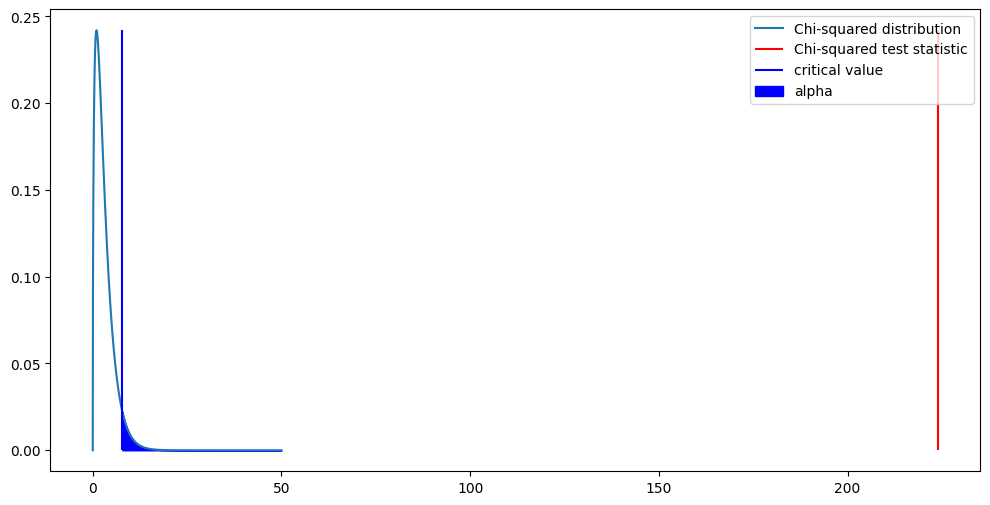

In [131]:
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,dof), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="red", label="Chi-squared test statistic")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme than the critical value (according to the significance level = alpha)
plt.fill_between(xt, chi2.pdf(xt,dof), where=(xt>critical_value), color= "b", label="alpha")
plt.legend()
plt.show()

The test statistic falls well after the critical value. Therefore, we reject the Null Hypothesis. Based on the analysis, the four different button versions DO perform significantly different.  

# Quicker coding approach

Two options to determine whether or not to reject the Null Hypothesis:


*   Compare the alpha to the so-called p-value (most common approach), or,
*   Comparing the test statistic to the critical region.

Both results will be the same.

## Chi-squared distribution, test statistic, critical value and alpha

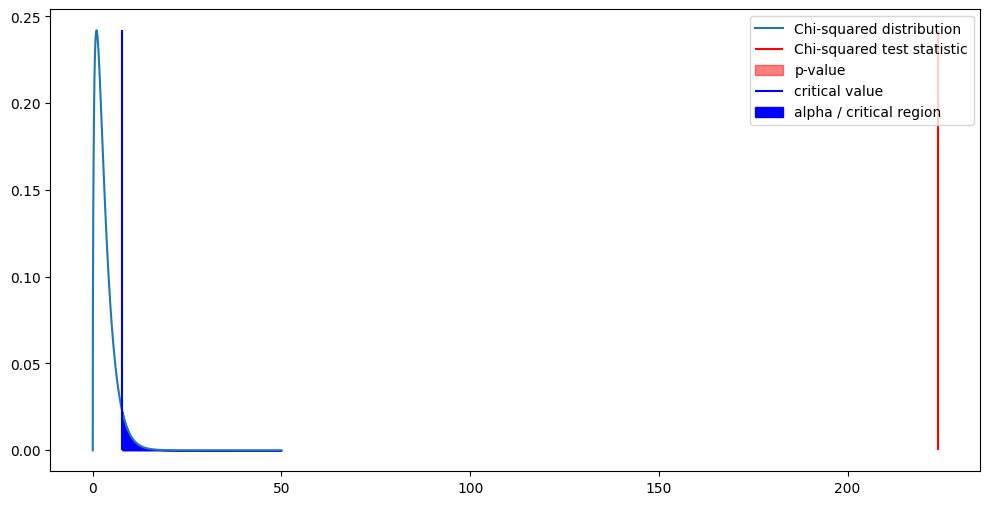

In [132]:
plt.figure(figsize=(12,6))
# Plot a chi-squared distribution with the degrees of freedom from our sample.
plt.plot(xt, chi2.pdf(xt,dof), label="Chi-squared distribution")
# Add a vertical line for the chi-squared test statistic.
plt.vlines(chi_squared, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="red", label="Chi-squared test statistic")
# Shade the region in the tails that is more extreme than the test statistic (= p-value).
plt.fill_between(xt, chi2.pdf(xt,dof), where=(xt>chi_squared), color= "r", alpha=0.5, label="p-value")
# Add vertical line for the critical value.
plt.vlines(critical_value, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="blue", label="critical value")
# Shade the area under the curve for values more extreme tha the alpha
plt.fill_between(xt, chi2.pdf(xt,dof), where=(xt>critical_value), color= "b", label="alpha / critical region")
plt.legend()
plt.show()

In [133]:
chisq, pvalue, df, expected = chi2_contingency(observed_results)

In [134]:
chisq

224.01877488058412

In [135]:
pvalue

2.7161216607868712e-48

In [136]:
df

3

In [137]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

In [138]:
chi_squared == chisq

False

In [139]:
#result above should not be false--it should be TRUE
#how to ensure that numbers are compared at equal figures length?
chi_squared

224.0187748805841

# Which is the winning version?

As the chi-square only tells us whether there is a statistically significant difference between the observed and expected values, we now need to determine which of the versions performed better.


One quick approach is to use the observed table to calculate percentages of clicks to no-clicks.  The version with the highest percentage is the winner. **Spoiler**: for the test in this notebook, version C is the winner.

A longer approach is to do a **"Post-Hoc test after the chi-square"** where a new chi-square test is done for each pair of possible comparison combinations (permutations or variations). These are the new variants.

## Quick approach to determine winner

In [140]:
observed_results

,A,B,C,D
clicks,512,281,527,193
no_clicks,24814,24466,24349,25040


In [141]:
vA_percent = (512/24814)*100
vB_percent = (281/24466)*100
vC_percent = (527/24349)*100
vD_percent = (193/25040)*100

In [ ]:
vA_percent, vB_percent, vC_percent, vD_percent
#results show version C to be the winner as it has the highest percentage

(2.0633513339243974,
 1.1485326575656014,
 2.1643599326461045,
 0.7707667731629393)

## "Post-Hoc test" to determine winner

Original version is version A.

Possible comparison combinations (permutations or variations) for performing additional chi-square tests:


*   A vs B
*   A vs C
*   A vs D
*   B vs C
*   B vs D
*   C vs D

Will use the Bonferroni Adjustment "to counteract the problem of Type I Error that occurs when multiple comparison are made" (where confidence level reduces and there are more chances for making a mistake).

Rather than setting the alpha level (p-value) at 0.05 (with a 95% confidence level), will divide 0.05 by the number of paired comparisons that will be making.

So, new alpha-level (p-value) is 0.05/6= 0.008



In [143]:
alpha = 0.008

- $H_0$:A=B
- $H_A$: A!=B


If the **p_value** is lower than the significance level (**alpha**), we reject the Null Hypothesis.

### Chi-square: A vs B

In [100]:
AB_clicks = [512, 281]
AB_no_clicks = [24814, 24466]

AB_observed_results = pd.DataFrame ([AB_clicks, AB_no_clicks],
                                 columns = ["A", "B"],
                                 index = ["clicks", "no_clicks"])

,A,B
clicks,512,281
no_clicks,24814,24466


In [145]:
chisqAB, pvalueAB, dfAB, expectedAB = chi2_contingency(AB_observed_results)

In [ ]:
if pvalueAB > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is smallter than alpha, so we reject the Null Hypothesis


### Chi-square: A vs C

- $H_0$:A=C
- $H_A$: A!=C

In [149]:
AC_clicks = [512, 527]
AC_no_clicks = [24814, 24349]

AC_observed_results = pd.DataFrame ([AC_clicks, AC_no_clicks],
                                 columns = ["A", "C"],
                                 index = ["clicks", "no_clicks"])

In [151]:
chisqAC, pvalueAC, dfAC, expectedAC = chi2_contingency(AC_observed_results)

In [ ]:
if pvalueAC > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.


### Chi-square: A vs D

- $H_0$:A=D
- $H_A$: A!=D

In [154]:
AD_clicks = [512, 193]
AD_no_clicks = [24814, 25040]

AD_observed_results = pd.DataFrame ([AD_clicks, AD_no_clicks],
                                 columns = ["A", "B"],
                                 index = ["clicks", "no_clicks"])

In [155]:
chisqAD, pvalueAD, dfAD, expectedAD = chi2_contingency(AB_observed_results)

In [ ]:
if pvalueAD > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is smallter than alpha, so we reject the Null Hypothesis


### Chi-square: B vs C

- $H_0$:B=C
- $H_A$: B!=C

In [158]:
BC_clicks = [512, 281]
BC_no_clicks = [24814, 24466]

BC_observed_results = pd.DataFrame ([BC_clicks, BC_no_clicks],
                                 columns = ["A", "B"],
                                 index = ["clicks", "no_clicks"])

,A,B
clicks,512,281
no_clicks,24814,24466


In [159]:
chisqBC, pvalueBC, dfBC, expectedBC = chi2_contingency(BC_observed_results)

In [ ]:
if pvalueBC > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is smallter than alpha, so we reject the Null Hypothesis


### Chi-square: B vs D

- $H_0$:B=D
- $H_A$: B!=D

In [162]:
BD_clicks = [281, 193]
BD_no_clicks = [24466, 25040]

BD_observed_results = pd.DataFrame ([BD_clicks, BD_no_clicks],
                                 columns = ["A", "B"],
                                 index = ["clicks", "no_clicks"])

,A,B
clicks,281,193
no_clicks,24466,25040


In [163]:
chisqBD, pvalueBD, dfBD, expectedBD = chi2_contingency(BD_observed_results)

In [ ]:
if pvalueAB > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is smallter than alpha, so we reject the Null Hypothesis


### Chi-square: C vs D

- $H_0$:C=D
- $H_A$: C!=D

In [166]:
CD_clicks = [527, 193]
CD_no_clicks = [24349, 25040]

CD_observed_results = pd.DataFrame ([CD_clicks, CD_no_clicks],
                                 columns = ["A", "B"],
                                 index = ["clicks", "no_clicks"])
CD_observed_results

,A,B
clicks,527,193
no_clicks,24349,25040


In [167]:
chisqCD, pvalueCD, dfCD, expectedCD = chi2_contingency(CD_observed_results)

In [ ]:
if pvalueCD > alpha:
  print("The p-value is larger than alpha, so we do NOT reject the Null Hypothesis.")
else:
  print("The p-value is smaller than alpha, so we reject the Null Hypothesis")

The p-value is smallter than alpha, so we reject the Null Hypothesis


### Overview of all p-values

In [ ]:
pvalueAB
#A and B perform significantly differently, with A being the winner in that comparison.

2.6730880539675666e-15

In [ ]:
pvalueAC
#C vs. A: Not significant — A and C are similar.
#Null hypothesis of A=C was NOT rejected.

0.464842123017306

In [ ]:
pvalueAD
#A is significantly better than D.

2.6730880539675666e-15

In [ ]:
pvalueBC
#C is significantly better than B.

2.6730880539675666e-15

In [ ]:
pvalueBD
#B is significantly better than D.

2.3573374085176145e-05

In [ ]:
pvalueCD
#C is significantly better than D.

6.450501398841206e-37

### Conclusions

* Version C has a significantly better performance compared to D and B (based on the p-values).
* Version A also performed significantly better than D, but it didn't perform significantly differently from C.
* So, Version C is likely the best-performing version overall, even though the difference between A and C is not statistically significant.